# Tips Data EDA

In [7]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob


import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [3]:
# from textblob import TextBlob

In [4]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text.title()))

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_labels_full = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False

# Get sentiment of Each Review

In [5]:
def get_sentiment(df=None):
    time_marker('starting sentiment analysis...')
    df['polarity'] = np.nan
    df['subjectivity'] = np.nan
    df['polarity'] = df['text'].apply(lambda text: list(TextBlob(text).sentiment)[0])
    df['subjectivity'] = df['text'].apply(lambda text: list(TextBlob(text).sentiment)[1])
    time_marker('sentiment analysis complete!')
    return df

# Load Tips Dataset

In [6]:
time_marker(text='Loading Tips Data...')

tips = pd.DataFrame()
datafile = '../clean_data/tips_sentiment.csv'

# Chunk Settings
chunks = list()
chunksize = 10000
num_chunks = math.ceil(sum(1 for row in open(datafile, 'r'))/chunksize)
format_width = len(str(num_chunks))

# import file in chunks
for ii, chunk in enumerate(pd.read_csv(datafile, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):
        
    # drop reviews with missing tip text
    chunk = chunk[~chunk.text.isnull()]
    
#     # get sentiment of chunk
#     chunk = get_sentiment(df=chunk)
    
    # append chunk to chunks list
    chunks.append(chunk)
    if ii % math.ceil(num_chunks/10) == 0 or ii == num_chunks:
        time_marker(text='\tfinished chunk {} of {}'.format(str(ii+1).rjust(format_width), str(num_chunks).rjust(format_width)))

time_marker(text='merging to dataframe...')
tips = pd.concat(chunks)
tips.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[09:57:19.764564] Loading Tips Data...


FileNotFoundError: [Errno 2] No such file or directory: '../clean_data/tips_sentiment.csv'

In [8]:
time_marker(text='Loading Review Data...')

tips = pd.DataFrame()
file_path_slug = '../clean_data/tips/*.csv'
file_list = glob(file_path_slug)


# Chunk Settings
chunks = list()
chunksize = 10000
for ii, file in enumerate(sorted(file_list)):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):

        # drop reviews with missing review text
        chunk = chunk[(~chunk.text.isnull()) & (~chunk.user_id.isnull())].copy()
        
        # append chunk to chunks list
        chunks.append(chunk)
        
time_marker(text='merging to dataframe...')
tips = pd.concat(chunks)

time_marker('reseting index...')
tips.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')

[09:59:00.539600] Loading Review Data...
[09:59:00.545544] Reading 1 Of 64 ../Clean_Data/Tips/00_-_Tips_Clean.Csv...
[09:59:00.668732] Reading 2 Of 64 ../Clean_Data/Tips/01_0_Tips_Clean.Csv...
[09:59:00.765934] Reading 3 Of 64 ../Clean_Data/Tips/02_1_Tips_Clean.Csv...
[09:59:00.871857] Reading 4 Of 64 ../Clean_Data/Tips/03_2_Tips_Clean.Csv...
[09:59:00.968507] Reading 5 Of 64 ../Clean_Data/Tips/04_3_Tips_Clean.Csv...
[09:59:01.103697] Reading 6 Of 64 ../Clean_Data/Tips/05_4_Tips_Clean.Csv...
[09:59:01.192580] Reading 7 Of 64 ../Clean_Data/Tips/06_5_Tips_Clean.Csv...
[09:59:01.301624] Reading 8 Of 64 ../Clean_Data/Tips/07_6_Tips_Clean.Csv...
[09:59:01.418976] Reading 9 Of 64 ../Clean_Data/Tips/08_7_Tips_Clean.Csv...
[09:59:01.525980] Reading 10 Of 64 ../Clean_Data/Tips/09_8_Tips_Clean.Csv...
[09:59:01.642532] Reading 11 Of 64 ../Clean_Data/Tips/10_9_Tips_Clean.Csv...
[09:59:01.738112] Reading 12 Of 64 ../Clean_Data/Tips/11_A_Tips_Clean.Csv...
[09:59:01.865842] Reading 13 Of 64 ../Clean_

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027721 entries, 0 to 1027720
Data columns (total 6 columns):
business_id    1027721 non-null object
date           1027721 non-null datetime64[ns]
likes          1027721 non-null int64
text           1027721 non-null object
user_id        1027721 non-null object
tip_len        1027721 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 47.0+ MB


# Write to File

In [ ]:
time_marker('writing to file...')
tips.to_csv('../clean_data/tips_sentiment.csv', encoding='utf-8')
time_marker('complete!')

# Investigation

In [7]:
print('{} total reviews'.format(tips.shape[0]))
for col in sorted(tips.columns):
    print('{} contains {} unique entries'.format(str(col).ljust(15), str(len(tips[col].unique())).rjust(7)))

1028801 total reviews
business_id     contains  104412 unique entries
date            contains    3004 unique entries
likes           contains      13 unique entries
polarity        contains   36991 unique entries
subjectivity    contains   18529 unique entries
text            contains  968488 unique entries
tip_len         contains     500 unique entries
user_id         contains  244632 unique entries


# Tip Lengths

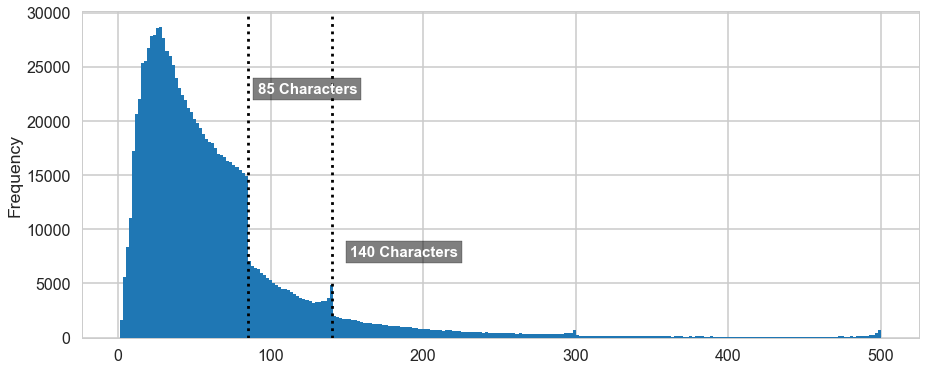

In [8]:
plt.subplots(figsize=FIG_SIZE)

ax = tips.tip_len.plot(kind='hist', bins=250)


v_markers = {'85':0.75,
            '140':0.25}

for k, v in v_markers.items():
    # draw vertical line at twitter character count limit
    ax.axvline(x=int(k), color='k', linestyle=':')
    label = '{} Characters'.format(k)
    ax.text(int(k)/(tips.tip_len.max())+.04, v, label,
        horizontalalignment='left',
        verticalalignment='baseline',
        transform=ax.transAxes,
        size=TICK_FONT_SIZE, color='w', weight='bold', alpha=1.0, backgroundcolor=(0.0, 0.0, 0.0, 0.5))

plt.show()
plt.close()

In [19]:
for year in sorted(tips.date.dt.year.unique())[1:]:
    print(year)

2010
2011
2012
2013
2014
2015
2016
2017


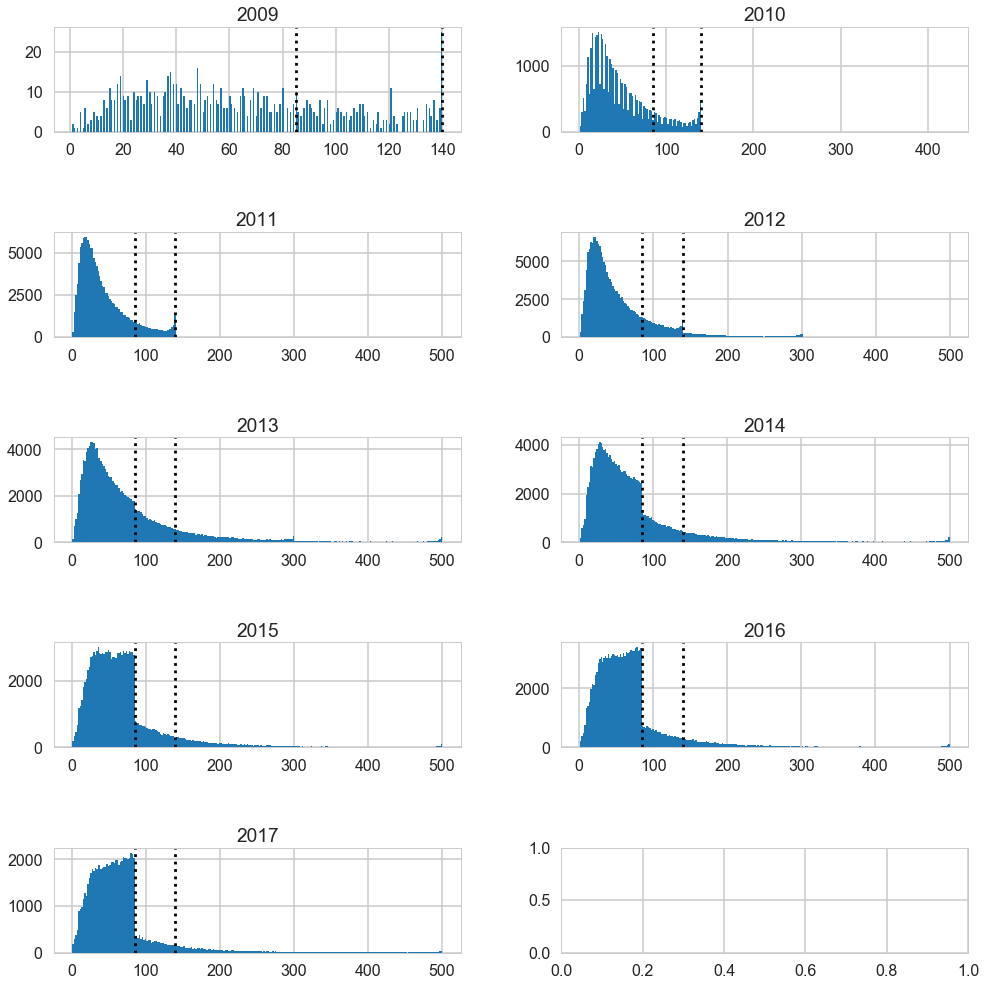

In [43]:
plt.rcParams['figure.figsize'] = (15,15)

NROWS = 5
NCOLS = 2

fig, axes = plt.subplots(nrows=NROWS, ncols=NCOLS)

ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()
ax_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for ii, year in enumerate(sorted(tips.date.dt.year.unique())):
    
    ax_list[ii].hist(tips[tips.date.dt.year == year].tip_len, bins=250)
    ax_list[ii].set_title('{:d}'.format(year))
    
    v_markers = {'85':0.75,
            '140':0.25}

    for k, v in v_markers.items():
        # draw vertical line at twitter character count limit
        ax_list[ii].axvline(x=int(k), color='k', linestyle=':')
        
plt.tight_layout()  
plt.show()
plt.close()
    

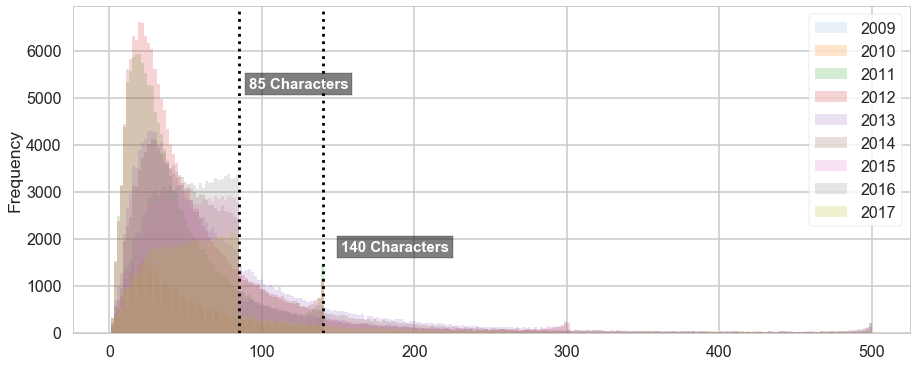

In [48]:
plt.subplots(figsize=FIG_SIZE)

ax = tips[tips.date.dt.year == sorted(tips.date.dt.year.unique())[0]].tip_len.plot(kind='hist', bins=250, label=str(sorted(tips.date.dt.year.unique())[0]), alpha=0.1)
for year in sorted(tips.date.dt.year.unique())[1:]:
    
    tips[tips.date.dt.year == year].tip_len.plot(kind='hist', bins=250, ax=ax, label='{}'.format(year), alpha=0.2)


v_markers = {'85':0.75,
            '140':0.25}

for k, v in v_markers.items():
    # draw vertical line at twitter character count limit
    ax.axvline(x=int(k), color='k', linestyle=':')
    label = '{} Characters'.format(k)
    ax.text(int(k)/(tips.tip_len.max())+.04, v, label,
        horizontalalignment='left',
        verticalalignment='baseline',
        transform=ax.transAxes,
        size=TICK_FONT_SIZE, color='w', weight='bold', alpha=1.0, backgroundcolor=(0.0, 0.0, 0.0, 0.5))

ax.legend(loc=1, frameon=True)
plt.show()
plt.close()

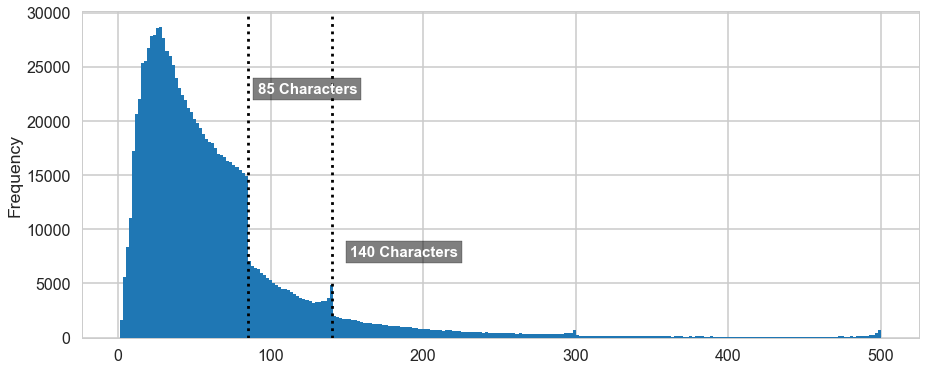

In [49]:
plt.subplots(figsize=FIG_SIZE)

ax = tips.tip_len.plot(kind='hist', bins=250)


v_markers = {'85':0.75,
            '140':0.25}

for k, v in v_markers.items():
    # draw vertical line at twitter character count limit
    ax.axvline(x=int(k), color='k', linestyle=':')
    label = '{} Characters'.format(k)
    ax.text(int(k)/(tips.tip_len.max())+.04, v, label,
        horizontalalignment='left',
        verticalalignment='baseline',
        transform=ax.transAxes,
        size=TICK_FONT_SIZE, color='w', weight='bold', alpha=1.0, backgroundcolor=(0.0, 0.0, 0.0, 0.5))

plt.show()
plt.close()

# Tip Subjectivity

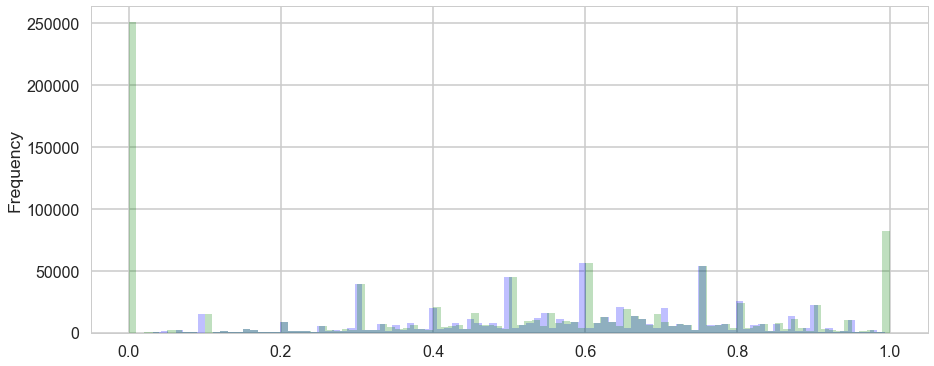

In [50]:
plt.subplots(figsize=FIG_SIZE)

ax = tips[(tips.subjectivity > 0) & (tips.subjectivity < 1)].subjectivity.plot(kind='hist', bins=100, color='b', alpha=0.25)
tips.subjectivity.plot(kind='hist', bins=100, color='g', alpha=0.25, ax=ax)


plt.show()
plt.close()

# Tip Polarity

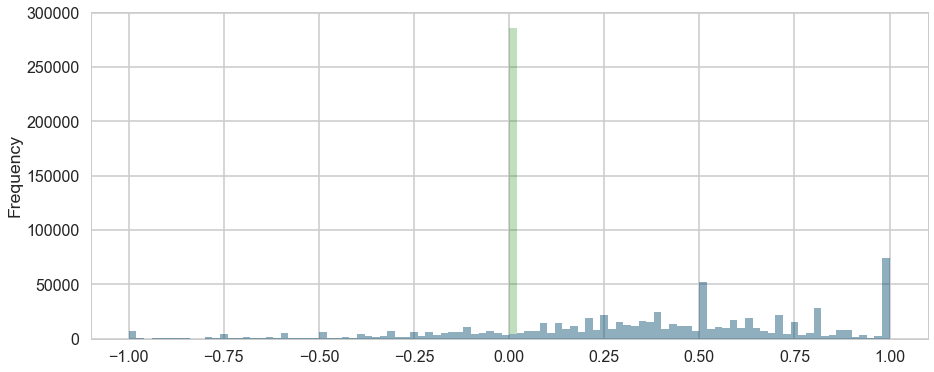

In [51]:
plt.subplots(figsize=FIG_SIZE)

ax = tips[tips.polarity != 0].polarity.plot(kind='hist', bins=100, color='b', alpha=0.25)
tips.polarity.plot(kind='hist', bins=100, color='g', ax=ax, alpha=0.25)

plt.show()
plt.close()

# Tip Polarity vs Subjectivity

In [52]:
pruned = tips[(tips.polarity != 0) & (tips.subjectivity > -1) & (tips.subjectivity < 1)].copy()

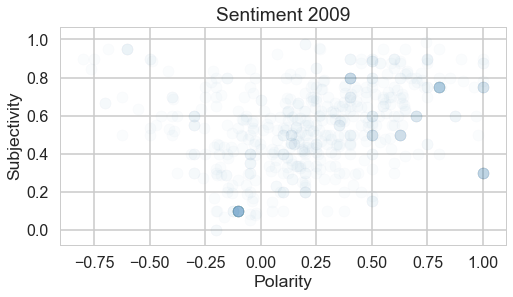

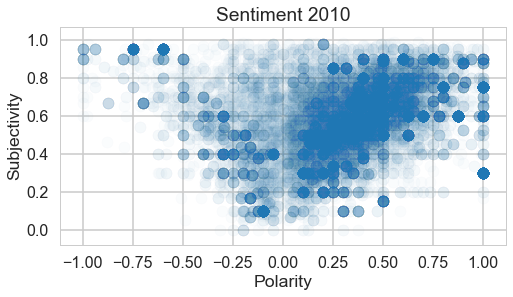

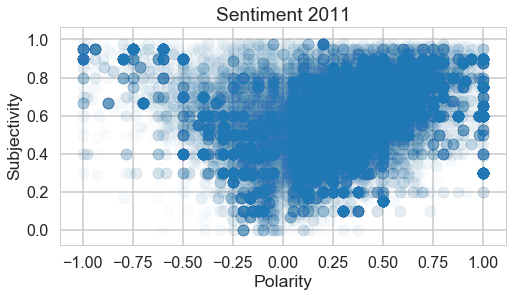

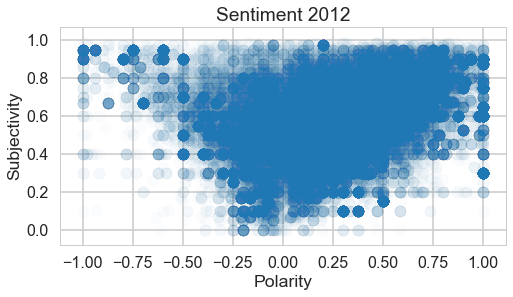

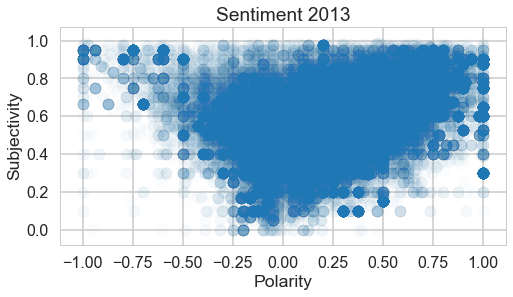

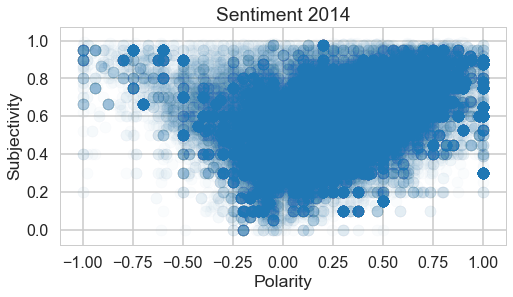

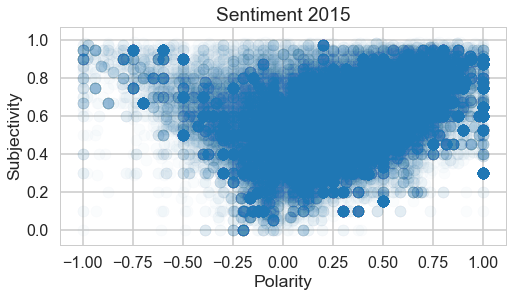

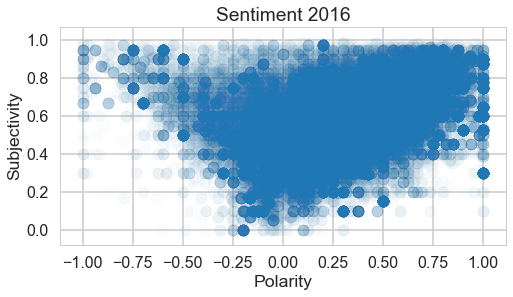

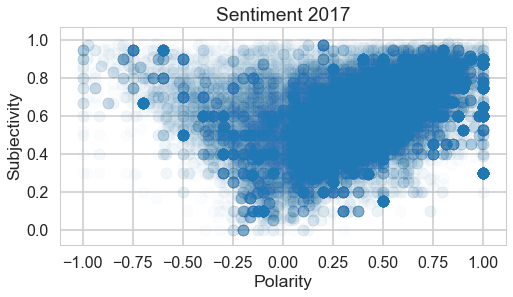

In [53]:
for year in sorted(pruned.date.dt.year.unique()):

    df = pruned[pruned.date.dt.year == year]

    plt.subplots(figsize=(8,4))
    ax = plt.scatter(x=df.polarity, y=df.subjectivity, alpha=0.02)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.title('Sentiment {:d}'.format(year))
    plt.show()
    plt.close()


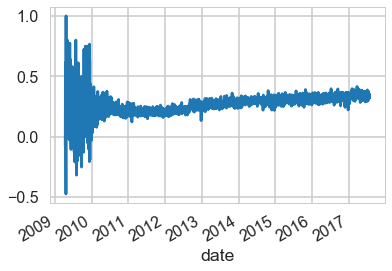

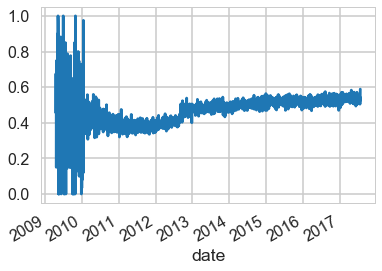

In [13]:
tips.groupby('date').polarity.mean().plot()
plt.show()
plt.close()

tips.groupby('date').subjectivity.mean().plot()
plt.show()
plt.close()

# Tips Per User

In [54]:
tips.head(3)

,business_id,date,likes,text,user_id,tip_len,polarity,subjectivity
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g,37,0.050000,0.400000
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg,75,0.387321,0.554643
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw,59,0.700000,0.875000


In [55]:
n_tips = len(tips)
n_users = tips.user_id.unique().size
n_businesses = tips.business_id.unique().size
n_likes = tips.likes.unique().size
n_dates = tips.date.unique().size

print('Number of tips        {}'.format(str(n_tips).rjust(8)))
print('Number of users       {}'.format(str(n_users).rjust(8)))
print('Number of businesses  {}'.format(str(n_businesses).rjust(8)))
print('Number of likes       {}'.format(str(n_likes).rjust(8)))
print('Number of dates       {}'.format(str(n_dates).rjust(8)))

Number of tips         1028801
Number of users         244632
Number of businesses    104412
Number of likes             13
Number of dates           3004


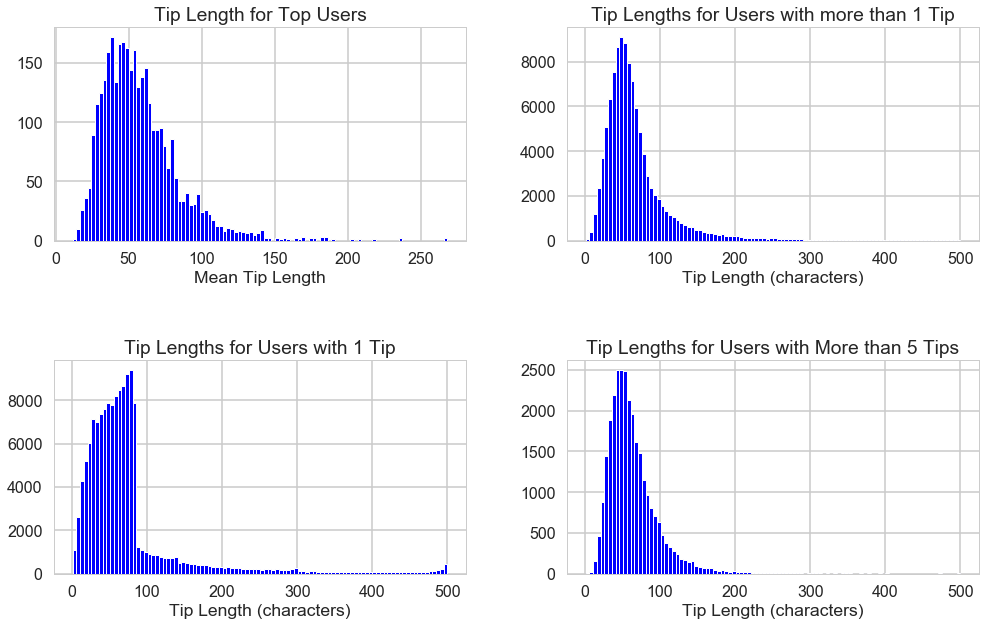

In [56]:
grp = tips.groupby('user_id')  # group tips by user_id
counts = grp.user_id.count()   # number of tips by each user_id
means = grp.tip_len.mean()     # average tip length of each user_id


plt.rcParams['figure.figsize'] = (15,10)

fig, axes = plt.subplots(nrows=2, ncols=2)
width = 0.3
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(means[counts>counts.mean() + (2*counts.std())], bins=100, edgecolor='w', color='b', lw=1)
ax0.set_xlabel("Mean Tip Length")
ax0.set_title('Tip Length for Top Users')

ax1.hist(means[counts > 1], bins=100, edgecolor='w', color='b', lw=1)
ax1.set_xlabel('Tip Length (characters)')
ax1.set_title('Tip Lengths for Users with more than 1 Tip')


ax2.hist(means[counts == 1], bins=100, edgecolor='w', color='b', lw=1)
ax2.set_xlabel('Tip Length (characters)')
ax2.set_title('Tip Lengths for Users with 1 Tip')

ax3.hist(means[counts>5], bins=100, edgecolor='w', color='b', lw=1)
ax3.set_xlabel('Tip Length (characters)')
ax3.set_title('Tip Lengths for Users with More than 5 Tips')

plt.tight_layout()
plt.show()
plt.close()


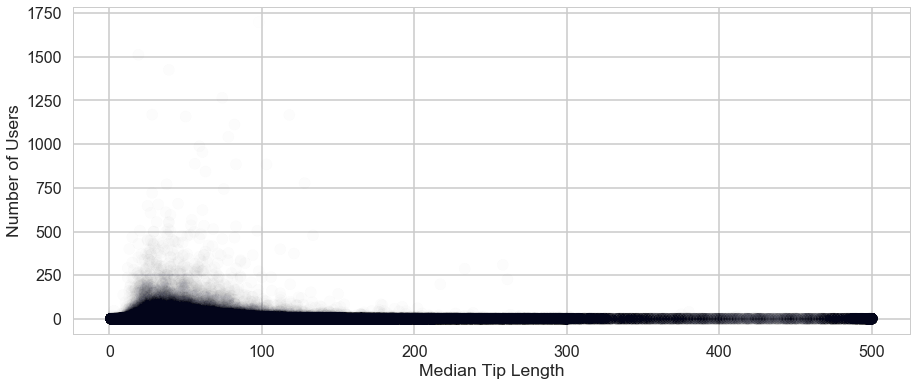

In [57]:
plt.subplots(figsize=FIG_SIZE)
plt.scatter(x=grp.tip_len.median(), y=grp.user_id.count(), c=grp.likes.sum(), alpha=0.01)
plt.xlabel('Median Tip Length')
plt.ylabel('Number of Users')
plt.show()
plt.close()